In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

cardio_csv = 'cardio_train2.csv'

cardio_df = pd.read_csv(cardio_csv)
cardio_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [102]:
engine = create_engine('sqlite:///cardio.db', echo=False)
cardio_df.to_sql('cardio_table', engine, if_exists='replace', index=False)

print("Database created successfully.")

Database created successfully.


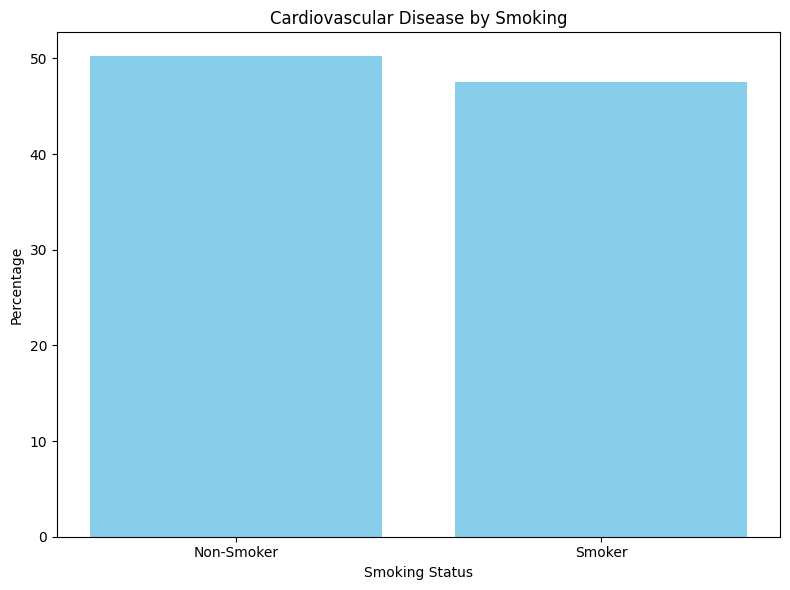

In [103]:
#Smoking
query = """
    SELECT 
        smoke, 
        AVG(cardio) * 100 AS cardio_percentage
    FROM 
        cardio_table
    GROUP BY 
        smoke
"""

smoking_proportions = pd.read_sql(query, engine)


fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(smoking_proportions['smoke'], smoking_proportions['cardio_percentage'], 
       color='skyblue', label='Percentage')
ax.set_title('Cardiovascular Disease by Smoking')
ax.set_ylabel('Percentage')
ax.set_xlabel('Smoking Status')
ax.set_xticks(smoking_proportions['smoke'])
ax.set_xticklabels(['Non-Smoker', 'Smoker'], rotation=0)

plt.tight_layout()
plt.show()

In [104]:
print(smoking_proportions)

   smoke  cardio_percentage
0      0          50.210713
1      1          47.479332


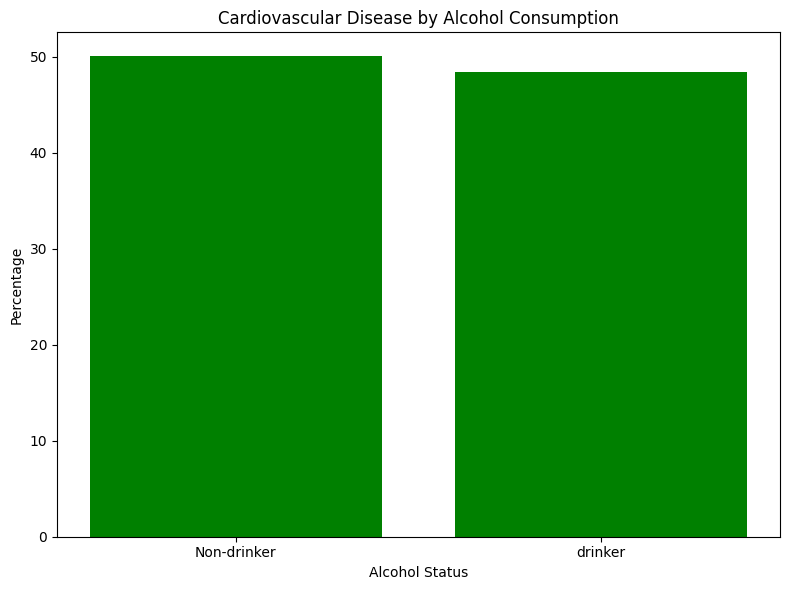

In [105]:
#drinking
query = """
    SELECT 
        alco, 
        AVG(cardio) * 100 AS cardio_percentage
    FROM 
        cardio_table
    GROUP BY 
        alco
"""

alcohol_proportions = pd.read_sql(query, engine)


fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(alcohol_proportions['alco'], alcohol_proportions['cardio_percentage'], 
       color='green', label='Percentage')
ax.set_title('Cardiovascular Disease by Alcohol Consumption')
ax.set_ylabel('Percentage')
ax.set_xlabel('Alcohol Status')
ax.set_xticks(alcohol_proportions['alco'])
ax.set_xticklabels(['Non-drinker', 'drinker'], rotation=0)

plt.tight_layout()
plt.show()

In [106]:
print(alcohol_proportions)

   alco  cardio_percentage
0     0          50.057371
1     1          48.432519


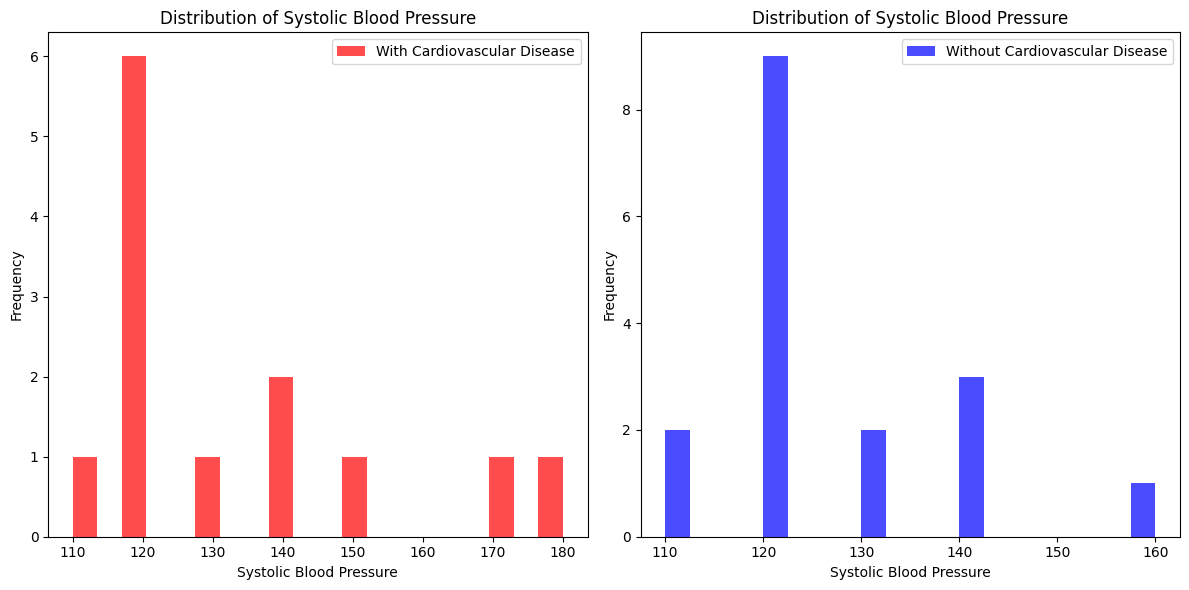

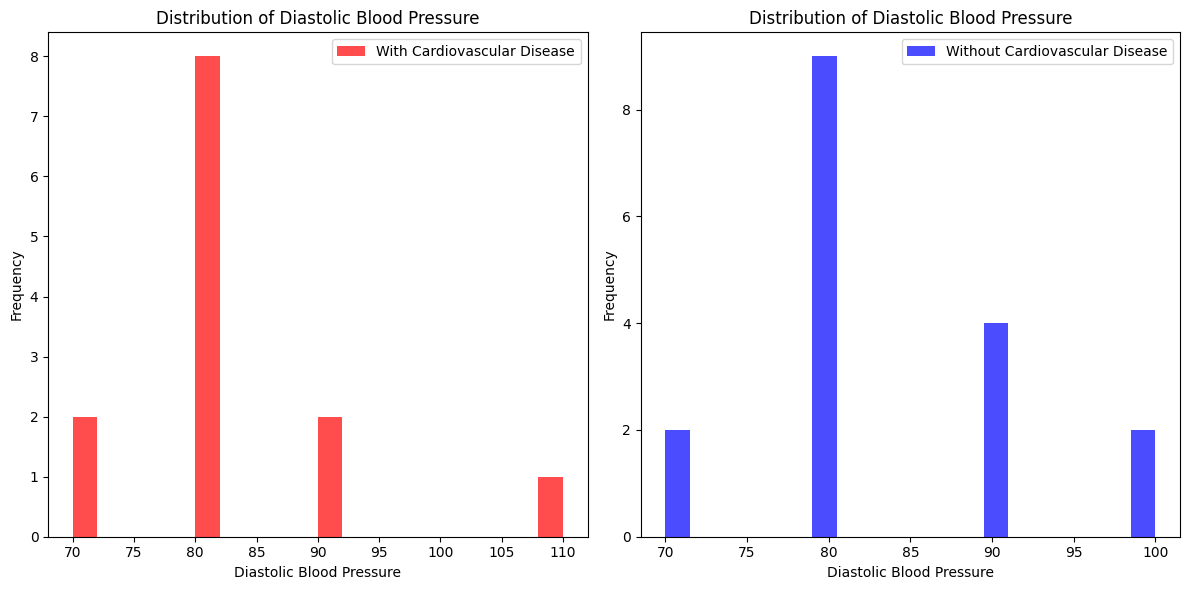

In [112]:
import numpy as np
# Randomly select IDs
random_ids = np.random.choice(cardio_df['id'], size=30, replace=False)
random_data = cardio_df[cardio_df['id'].isin(random_ids)]

with_cardio_disease = random_data[random_data['cardio'] == 1]
without_cardio_disease = random_data[random_data['cardio'] == 0]

# Create side-by-side histograms for systolic blood pressure
plt.figure(figsize=(12, 6))

# Histogram for systolic blood pressure with cardiovascular disease
plt.subplot(1, 2, 1)
plt.hist(with_cardio_disease['ap_hi'], bins=20, color='red', alpha=0.7, label='With Cardiovascular Disease')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Systolic Blood Pressure')
plt.legend()

# Histogram for systolic blood pressure without cardiovascular disease
plt.subplot(1, 2, 2)
plt.hist(without_cardio_disease['ap_hi'], bins=20, color='blue', alpha=0.7, label='Without Cardiovascular Disease')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Systolic Blood Pressure')
plt.legend()

plt.tight_layout()
plt.show()

# Create side-by-side histograms for diastolic blood pressure
plt.figure(figsize=(12, 6))

# Histogram for diastolic blood pressure with cardiovascular disease
plt.subplot(1, 2, 1)
plt.hist(with_cardio_disease['ap_lo'], bins=20, color='red', alpha=0.7, label='With Cardiovascular Disease')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Diastolic Blood Pressure')
plt.legend()

# Histogram for diastolic blood pressure without cardiovascular disease
plt.subplot(1, 2, 2)
plt.hist(without_cardio_disease['ap_lo'], bins=20, color='blue', alpha=0.7, label='Without Cardiovascular Disease')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Diastolic Blood Pressure')
plt.legend()

plt.tight_layout()
plt.show()


Normal bp for most adults is defined as a systolic blood pressure less than 120 and a diastolic pressure less than 80

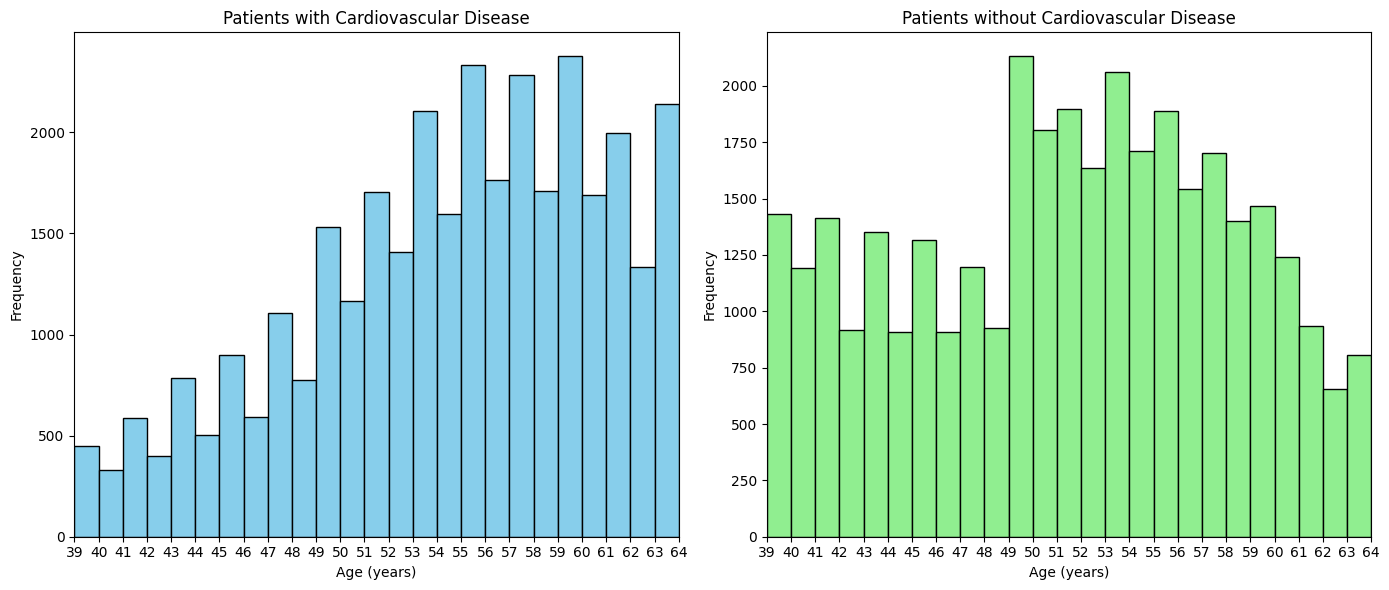

In [ ]:
#Age distribution
cardio_df['age_years'] = cardio_df['age'] / 365.25

# Split the dataset based on cardiovascular disease
with_cardio = cardio_df[cardio_df['cardio'] == 1]
without_cardio = cardio_df[cardio_df['cardio'] == 0]

bin_width = 1  
min_age = 39
max_age = int(cardio_df['age_years'].max())
bins = range(min_age, max_age + bin_width, bin_width)

plt.figure(figsize=(14, 6))

# Histogram for patients with cardiovascular disease
plt.subplot(1, 2, 1)
plt.hist(with_cardio['age_years'], bins=bins, color='skyblue', edgecolor='black')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Patients with Cardiovascular Disease')
plt.xticks(bins)
plt.xlim(min_age, max_age)

# Histogram for patients without cardiovascular disease
plt.subplot(1, 2, 2)
plt.hist(without_cardio['age_years'], bins=bins, color='lightgreen', edgecolor='black')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Patients without Cardiovascular Disease')
plt.xticks(bins)
plt.xlim(min_age, max_age)

plt.tight_layout()
plt.show()


In [ ]:
total_with_cardio = len(with_cardio)
total_without_cardio = len(without_cardio)

print(f"Total number of people with cardiovascular disease: {total_with_cardio}")
print(f"Total number of people without cardiovascular disease: {total_without_cardio}")

Total number of people with cardiovascular disease: 34979
Total number of people without cardiovascular disease: 35021


<Figure size 1000x600 with 0 Axes>

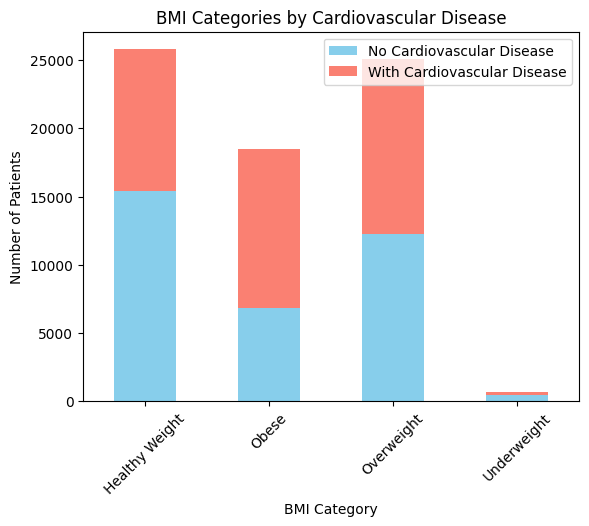

In [ ]:
#Convert height from centimeters to meters
cardio_df['height_m'] = cardio_df['height'] / 100

#BMI using weight in kg and height in m
cardio_df['bmi'] = cardio_df['weight'] / (cardio_df['height_m'] ** 2)

# Define function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25.0:
        return 'Healthy Weight'
    elif 25.0 <= bmi < 30.0:
        return 'Overweight'
    else:
        return 'Obese'

cardio_df['bmi_category'] = cardio_df['bmi'].apply(categorize_bmi)
bmi_cardio_grouped = cardio_df.groupby(['bmi_category', 'cardio']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
bmi_cardio_grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.xlabel('BMI Category')
plt.ylabel('Number of Patients')
plt.title('BMI Categories by Cardiovascular Disease')
plt.legend(['No Cardiovascular Disease', 'With Cardiovascular Disease'])
plt.xticks(rotation=45)
plt.show()


In [ ]:
print("Numerical values for each BMI category with and without cardiovascular disease:")
print(bmi_cardio_grouped)

Numerical values for each BMI category with and without cardiovascular disease:
cardio              0      1
bmi_category                
Healthy Weight  15440  10350
Obese            6823  11651
Overweight      12290  12796
Underweight       468    182


BMI is calculated as BMI = weight(kg)/height(m)^2 
the dataset had height in cm so we did a conversion.

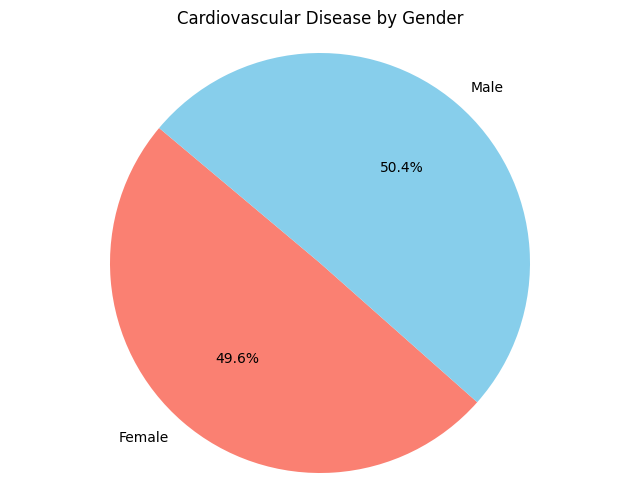

In [ ]:
#gender
gender_cardio_percentages = cardio_df.groupby('gender')['cardio'].mean() * 100
gender_cardio_percentages.index = gender_cardio_percentages.index.map({1: 'Female', 2: 'Male'})

plt.figure(figsize=(8, 6))
plt.pie(gender_cardio_percentages, labels=gender_cardio_percentages.index, autopct='%1.1f%%', startangle=140, colors=['salmon', 'skyblue'])
plt.title('Cardiovascular Disease by Gender')
plt.axis('equal')  
plt.show()


In [ ]:
print("Percentage of individuals with cardiovascular disease among males and females:")
print(gender_cardio_percentages)

Percentage of individuals with cardiovascular disease among males and females:
gender
Female    49.672743
Male      50.523089
Name: cardio, dtype: float64
